<a href="https://colab.research.google.com/github/abhisheksharma712/employee-turnover-/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [175]:
df=pd.read_csv('/content/Stockprice.csv')

In [176]:
df.head()

,Unnamed: 0,ds,y,year,month
0,0,1991-07-01,3.526591,1991,Jul
1,1,1991-08-01,3.180891,1991,Aug
2,2,1991-09-01,3.252221,1991,Sep
3,3,1991-10-01,3.611003,1991,Oct
4,4,1991-11-01,3.565869,1991,Nov


In [177]:
df=df[['ds','y']]

In [178]:
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      204 non-null    object 
 1   y       204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [180]:
df.shape

(204, 2)

In [181]:
df['ds']=pd.to_datetime(df['ds'])

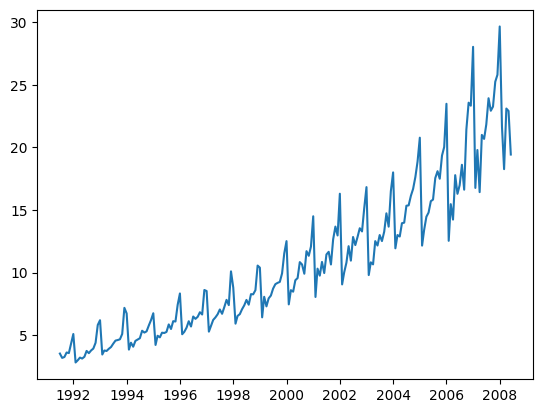

In [182]:
# timeplot
plt.plot(df['ds'],df['y'])
plt.show()

In [183]:
df.head(10)

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
5,1991-12-01,4.306371
6,1992-01-01,5.088335
7,1992-02-01,2.814520
8,1992-03-01,2.985811
9,1992-04-01,3.204780


In [184]:
# stacked line chart
df['year']=df['ds'].dt.year
df['month']=df['ds'].dt.strftime("%b")
df.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


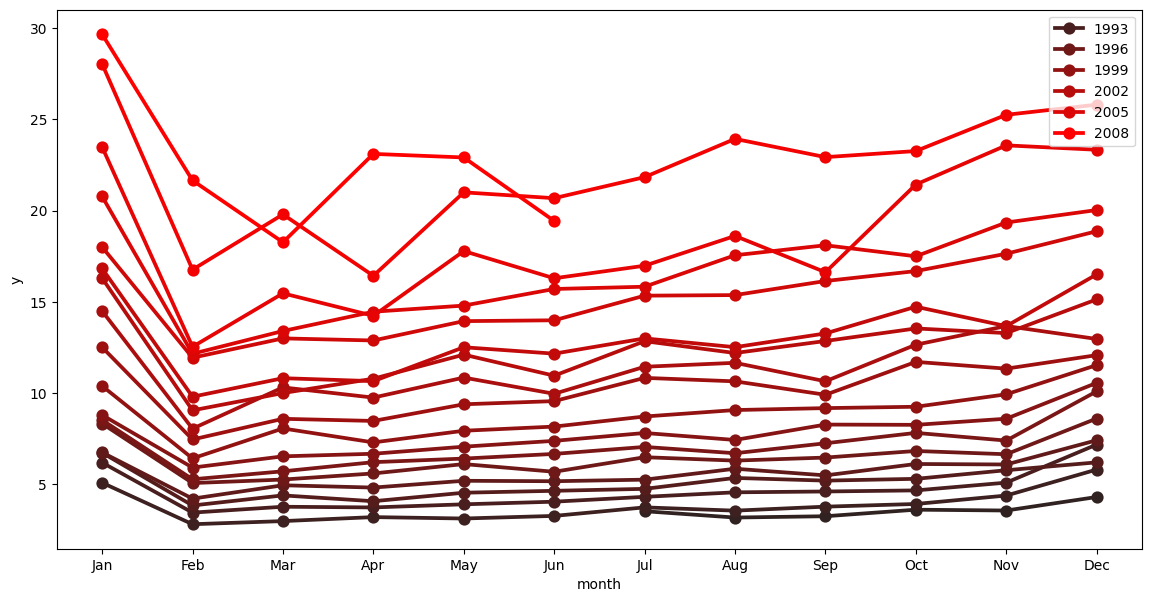

In [185]:
plt.figure(figsize=(14,7))
sns.pointplot(x='month',y='y',hue='year',data=df,color='red',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(loc='upper right')
plt.show()

<Figure size 1500x600 with 0 Axes>

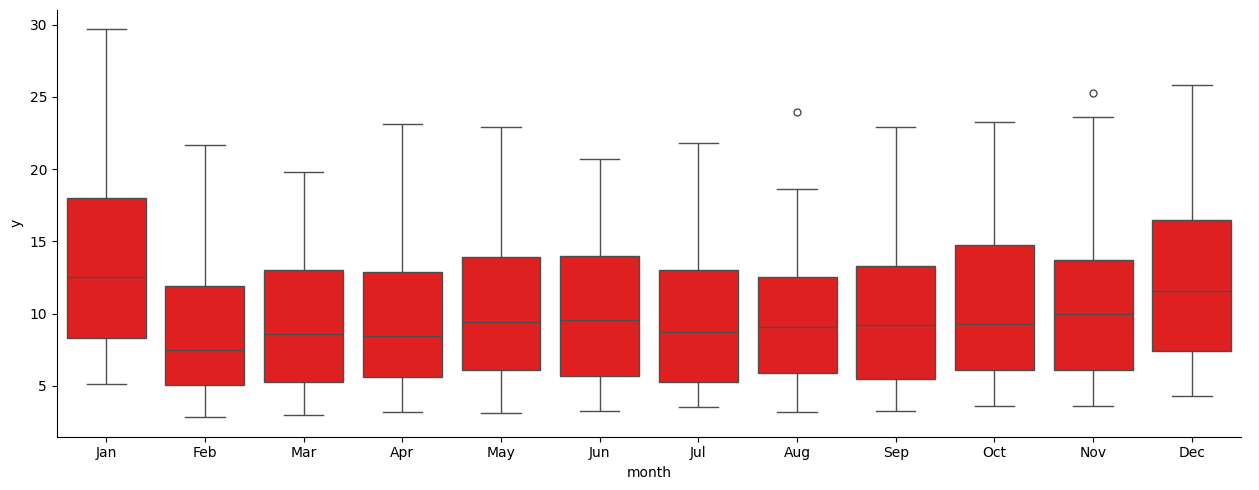

In [186]:
# boxplot
plt.figure(figsize=(15,6))
sns.catplot(x='month',y='y',kind='box',data=df,color='red',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],aspect=float(15/6))
plt.tight_layout()
plt.show()

In [187]:
# irreguarity in price of Aug and Nov


In [188]:
#Log Plot


A lag plot check the randomness. random data will not exhibit any identiied structure

In [189]:
from pandas.plotting import lag_plot

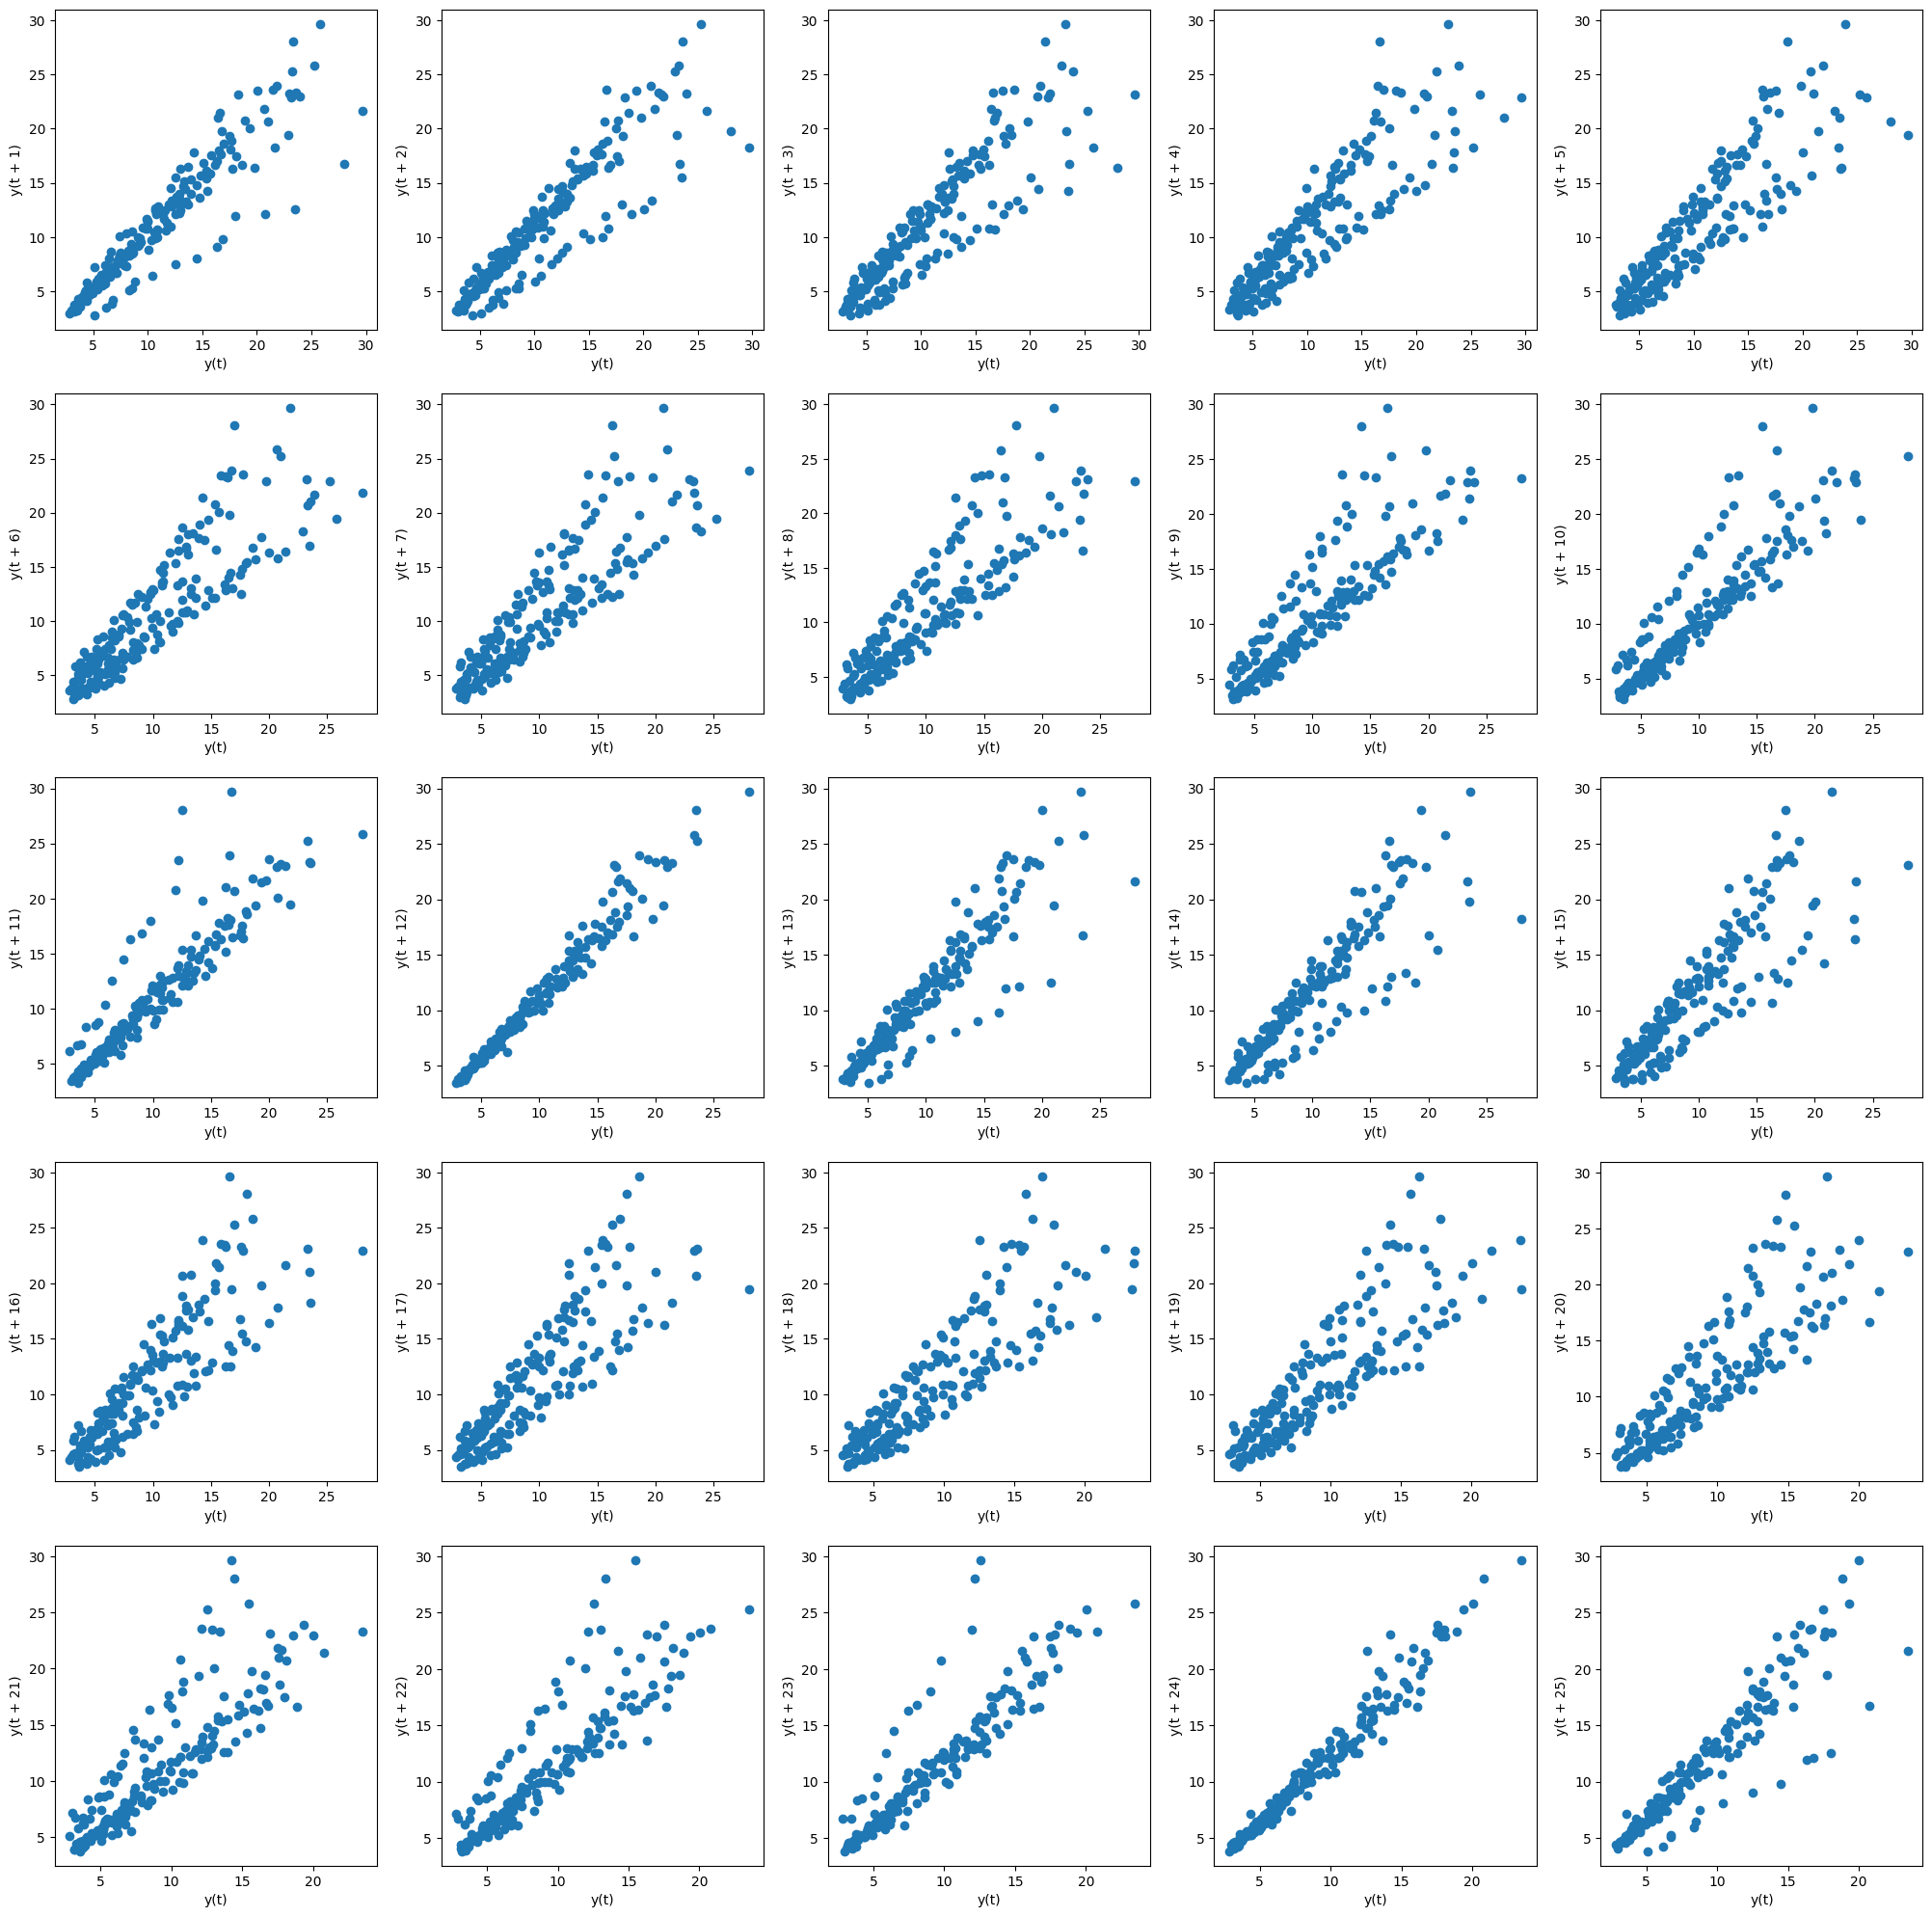

In [190]:
plotlags=25
rows=int(plotlags/5)
cols=int(plotlags/5)
fig,axes=plt.subplots(rows,cols)
fig.set_figwidth(plotlags)
fig.set_figheight(plotlags)
c=1
for i in range(rows):
  for j in range(cols):
    lag_plot(df['y'],ax=axes[i,j],lag=c)
    c+=1

In [191]:
 # data is not random

In [192]:
# autocorrelation plt-whether the element of time series are +vely correlated,-vely correlated or independent of each other


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

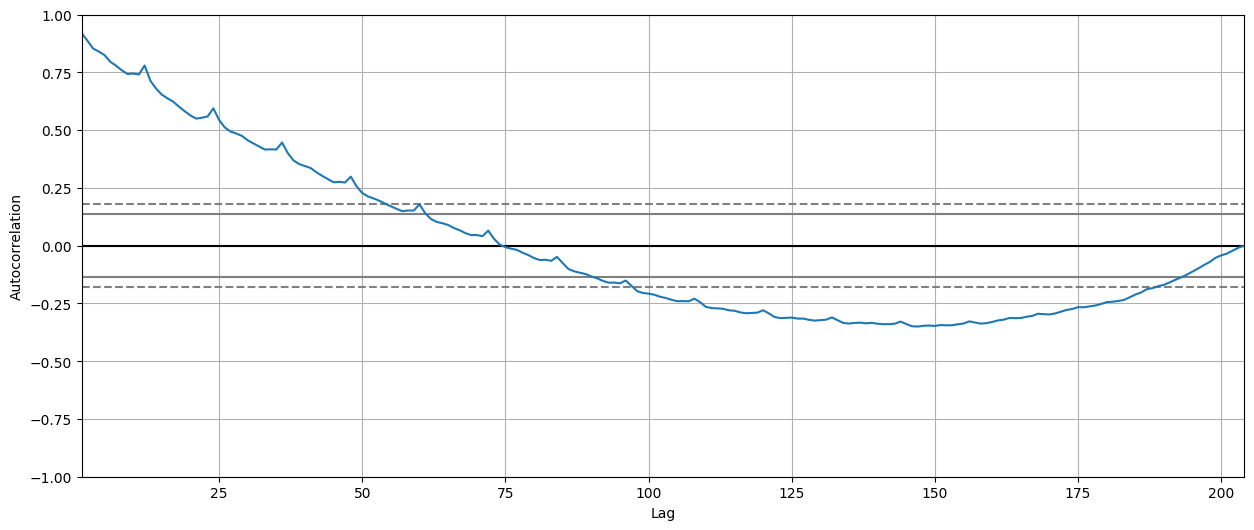

In [193]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,6))
autocorrelation_plot(df['y'])

In [194]:
a=df.iloc[0:-25,1]
b=df.iloc[25:,1]

<Axes: xlabel='y', ylabel='y'>

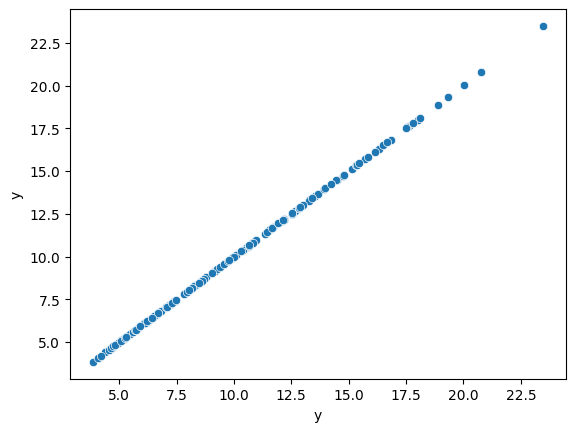

In [195]:
import seaborn as sns
sns.scatterplot(x=a, y=b)


In [196]:
np.corrcoef(a,b)

array([[1.        , 0.91489986],
       [0.91489986, 1.        ]])

In [197]:
# plot depicts that a strong positive relation which gradualy decay towards zero as lag increase


# decomposition consider time series as a collection of level trend and seasonality ,noise

a time is not a white noise if
1. mean is not zero
2. the variance change over time
3. correlation with lag

Trend- a trend exist when there is a long term increase/decrease in the data and need to be linear

seasonality- a seasonal pattern that occur when a time series if affected by a seasonal factors. Seasonality is always fixed and known frequency

residual-remove trend and seasonality or, any other obserable pattern then we left with white noise called as residuals

In [198]:
decompose=df[['ds','y']]
decompose.index=df['ds']
decompose=decompose[['y']]
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(decompose)


In [200]:
decomposition

In [201]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

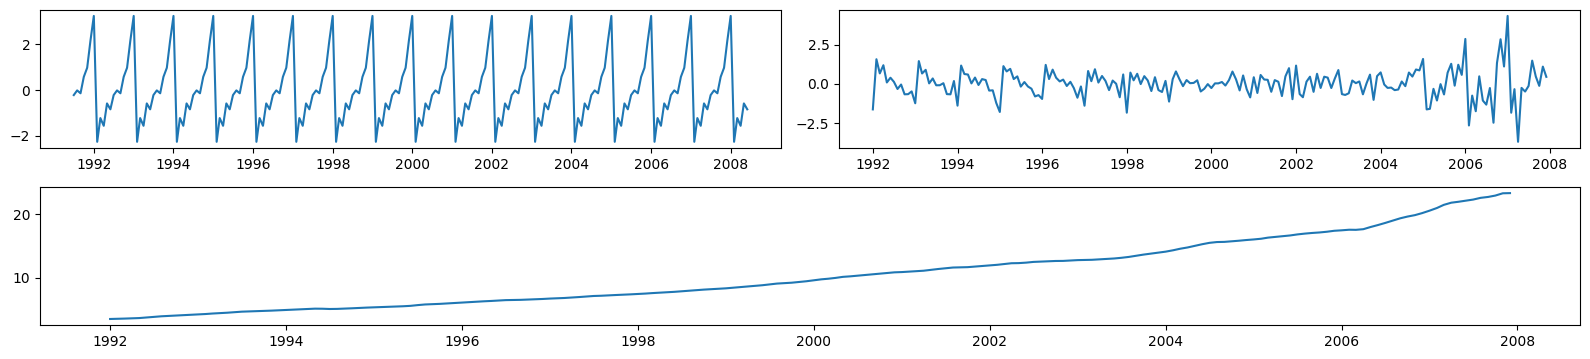

In [202]:
plt.figure(figsize=(16,7))
plt.subplot(4,1,1)
plt.plot(df['y'],label='original')
plt.subplot(4,1,2)
plt.plot(trend,label='trend')
plt.subplot(4,2,1)
plt.plot(seasonal,label='seasonal')
plt.subplot(4,2,2)
plt.plot(residual,label='original')
plt.tight_layout()
plt.show()


In [203]:
# stationarity- A time series is said to stationary  that has a constant mean,variance ,autocorrelation over time .the statistical properties of the time series do not change over time or depedent on the time period

In [204]:
# differencing- is technique to transform non stationary time series to
# stationary time series .it involves subtracting the current value form
# previos/lagged value. can remove trend,seasonality from the data may lead to white noise

In [205]:
# how to check series is statioanary or not ?
# statistical way to check stationary is by using ADF( Augmented Dickey Fuller test)
# order of differencing - how many times the differencing is done to achieve stationarity


In [206]:
tss=pd.read_csv('/content/Stockprice.csv')

In [207]:
tss['ds']=pd.to_datetime(tss['ds'])
tss.index=tss['ds']
tss=tss[['y']]
print(tss.shape)

(204, 1)


In [208]:
import datetime
x_train=tss[tss.index<datetime.datetime(2005,1,1,0,0)]
x_train.shape

(162, 1)

In [209]:
x_test=tss[tss.index>=datetime.datetime(2005,1,1,0,0,0)]
print(x_test.shape)

(42, 1)


In [210]:
from statsmodels.tsa.stattools import adfuller


Test statistic         2.228300
p-value                0.998905
count pf lags         14.000000
no.of Obs            147.000000
CriticalValue 1%      -3.475637
dtype: float64


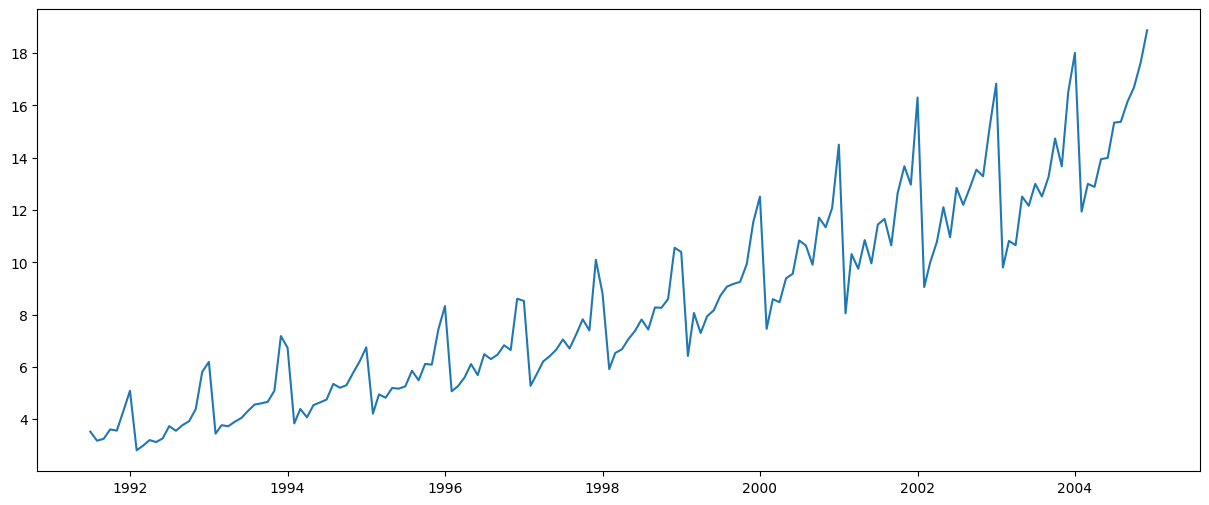

Test statistic         2.228300
p-value                0.998905
count pf lags         14.000000
no.of Obs            147.000000
CriticalValue 1%      -3.475637
CriticalValue 5%      -2.881410
dtype: float64


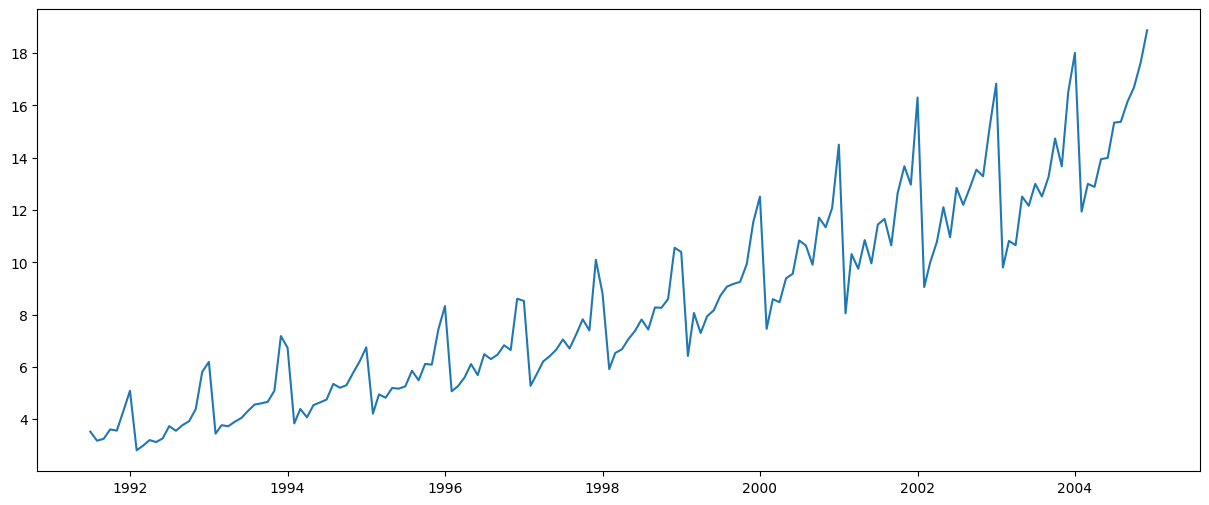

Test statistic          2.228300
p-value                 0.998905
count pf lags          14.000000
no.of Obs             147.000000
CriticalValue 1%       -3.475637
CriticalValue 5%       -2.881410
CriticalValue 10%      -2.577365
dtype: float64


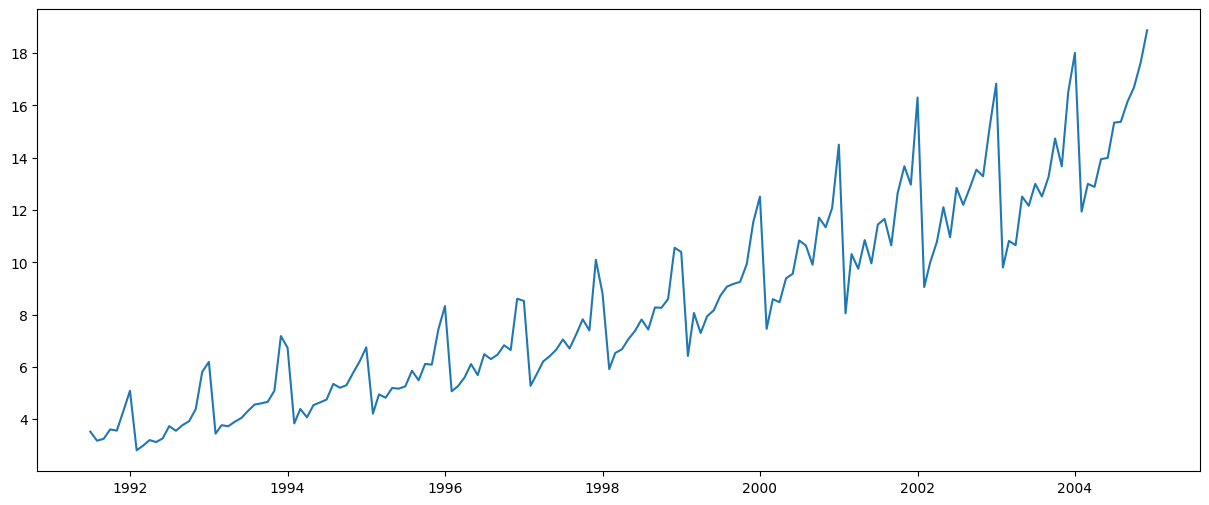

In [211]:
def stationary_test(data):
  dftest=adfuller(data.y,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','count pf lags','no.of Obs'])
  for key ,value in dftest[4].items():
    dfoutput['CriticalValue %s '%key]=value
    print(dfoutput)
    plt.figure(figsize=(15,6))
    plt.plot(data.index,data.y)
    plt.show()
stationary_test(x_train)

In [212]:
adfuller(x_train.y, autolag='AIC')


(2.228299680504983,
 0.9989049941867123,
 14,
 147,
 {'1%': -3.4756368462466662,
  '5%': -2.8814104466172608,
  '10%': -2.5773652982553568},
 260.9169725847081)

Test statistic        -0.660497
p-value                0.856718
count pf lags         14.000000
no.of Obs            147.000000
CriticalValue 1%      -3.475637
dtype: float64


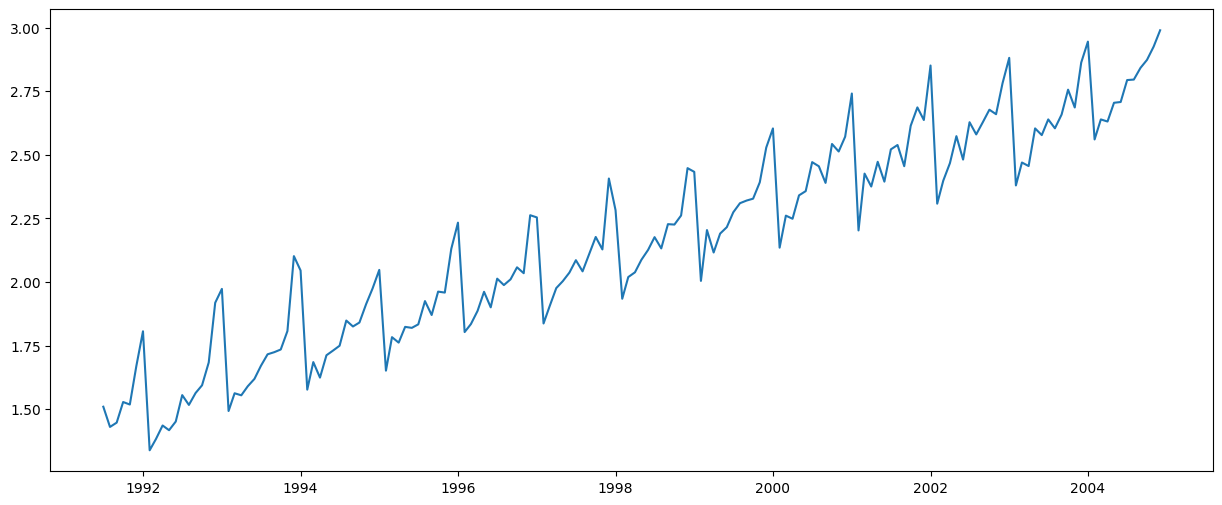

Test statistic        -0.660497
p-value                0.856718
count pf lags         14.000000
no.of Obs            147.000000
CriticalValue 1%      -3.475637
CriticalValue 5%      -2.881410
dtype: float64


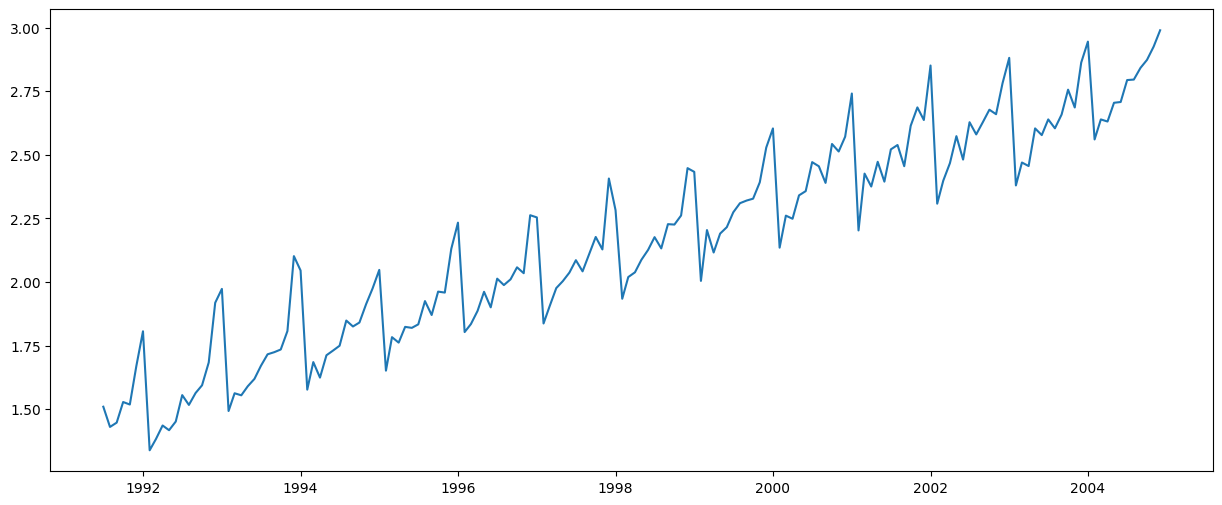

Test statistic         -0.660497
p-value                 0.856718
count pf lags          14.000000
no.of Obs             147.000000
CriticalValue 1%       -3.475637
CriticalValue 5%       -2.881410
CriticalValue 10%      -2.577365
dtype: float64


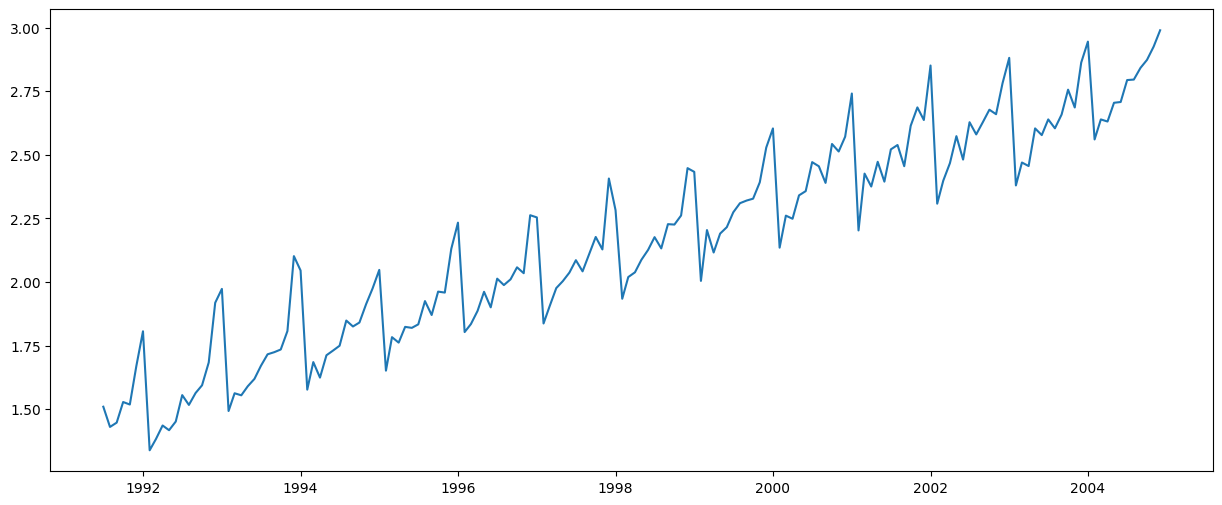

In [213]:
# applying log transform to reduce variance
import math
log_train=x_train
log_train=log_train['y'].apply(lambda x: math.log(x+1))
log_train=pd.DataFrame(log_train)
stationary_test(log_train)

Test statistic        -4.034900
p-value                0.001238
count pf lags         13.000000
no.of Obs            148.000000
CriticalValue 1%      -3.475325
dtype: float64


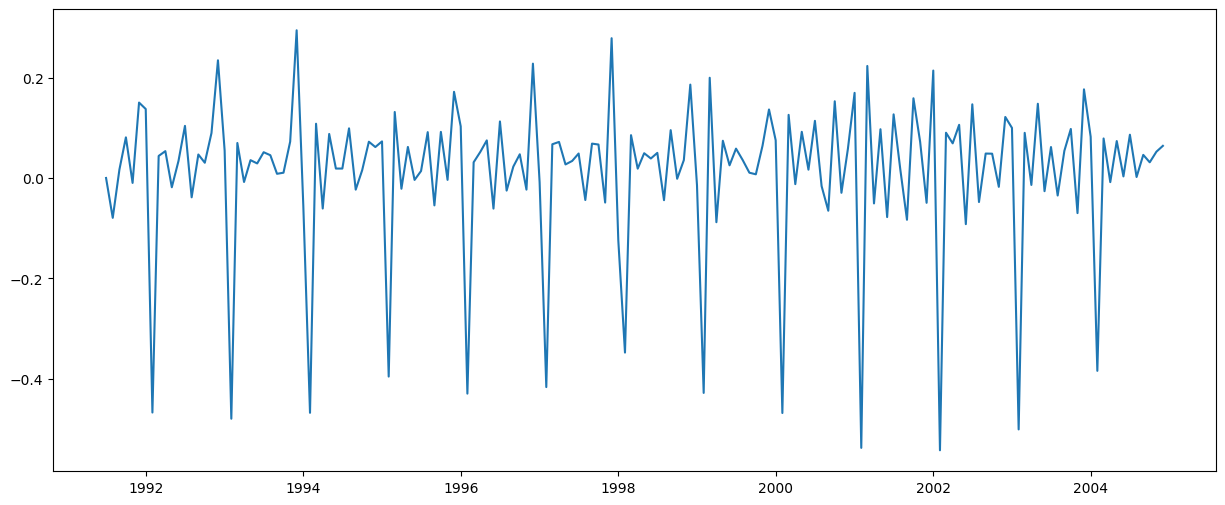

Test statistic        -4.034900
p-value                0.001238
count pf lags         13.000000
no.of Obs            148.000000
CriticalValue 1%      -3.475325
CriticalValue 5%      -2.881275
dtype: float64


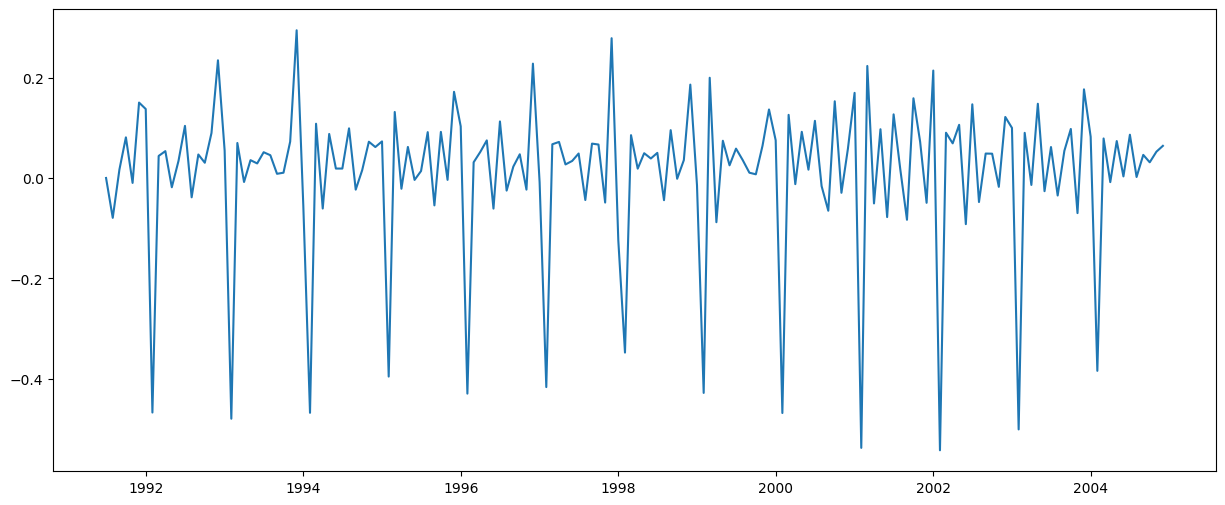

Test statistic         -4.034900
p-value                 0.001238
count pf lags          13.000000
no.of Obs             148.000000
CriticalValue 1%       -3.475325
CriticalValue 5%       -2.881275
CriticalValue 10%      -2.577293
dtype: float64


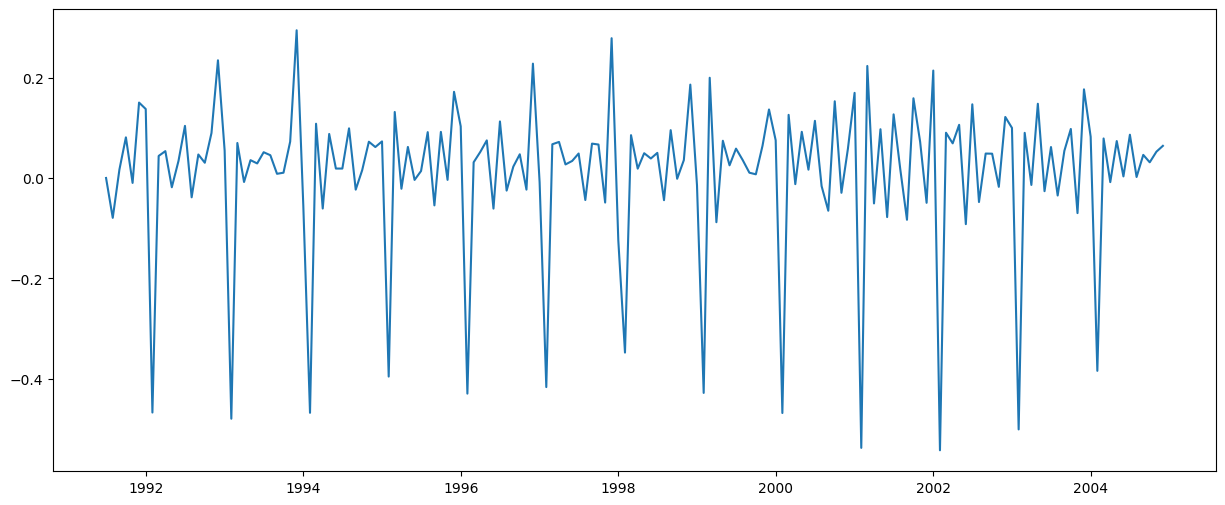

In [214]:
# yet stationarity not achieve so apply differencing here
f_d=log_train['y']-log_train['y'].shift(1)
f_d=f_d.fillna(0)
f_d=pd.DataFrame(f_d)
stationary_test(f_d)

Test statistic        -4.034900
p-value                0.001238
count pf lags         13.000000
no.of Obs            148.000000
CriticalValue 1%      -3.475325
dtype: float64


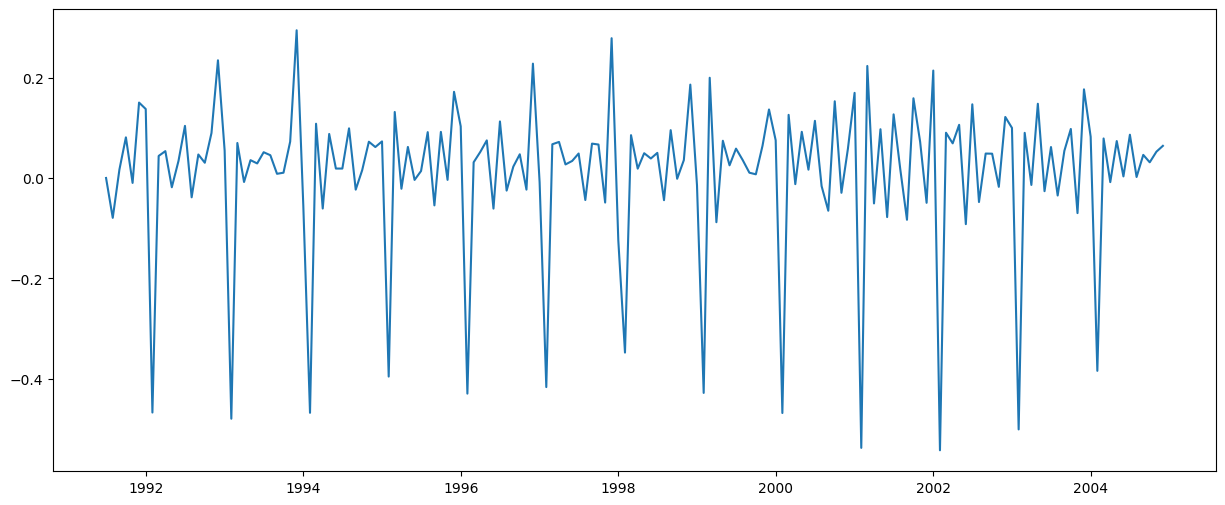

Test statistic        -4.034900
p-value                0.001238
count pf lags         13.000000
no.of Obs            148.000000
CriticalValue 1%      -3.475325
CriticalValue 5%      -2.881275
dtype: float64


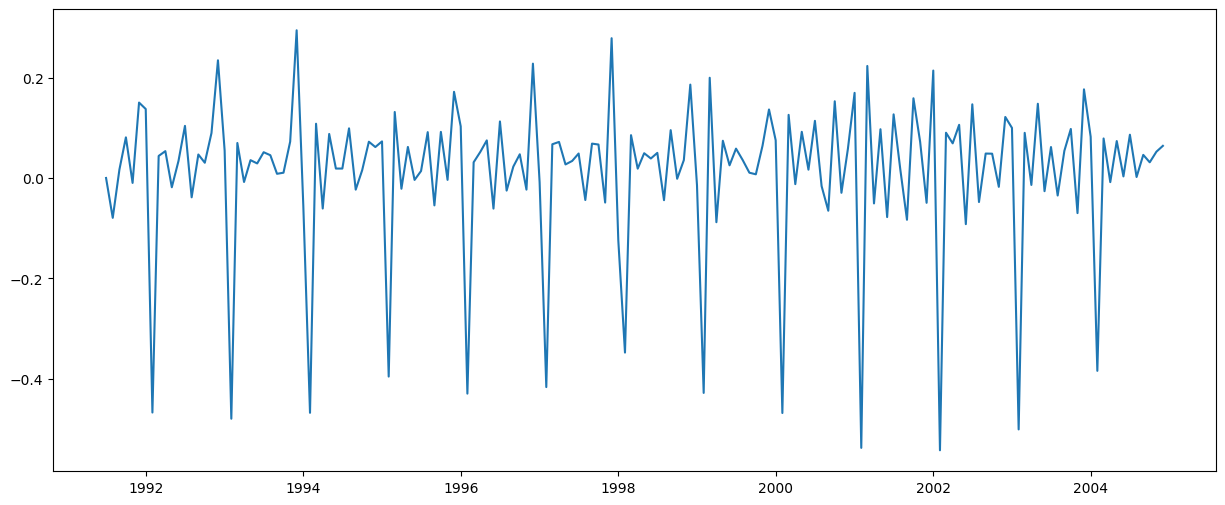

Test statistic         -4.034900
p-value                 0.001238
count pf lags          13.000000
no.of Obs             148.000000
CriticalValue 1%       -3.475325
CriticalValue 5%       -2.881275
CriticalValue 10%      -2.577293
dtype: float64


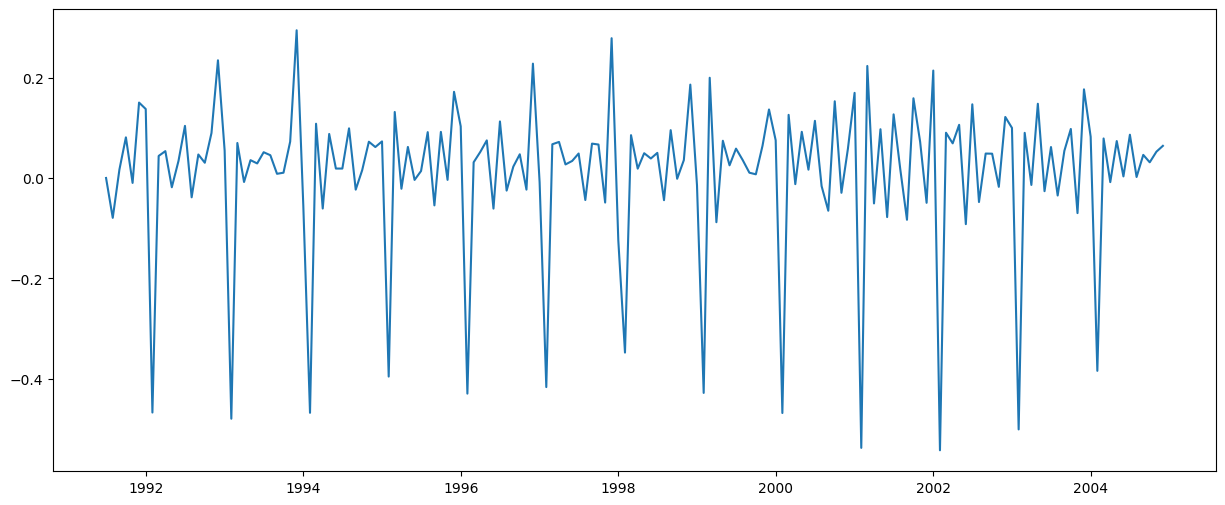

In [215]:
s_d=log_train['y']-log_train['y'].shift(12)
s_d=f_d.fillna(0)
s_d=pd.DataFrame(s_d)
stationary_test(s_d)

In [216]:
# series become stationary so now making a model


# Model Building
 1. AR ( Auto Regression) [predict future behavior using past data, when there is some correlation between the values in a time series with the values before/after.it is used for forecasting ]
 2. MA (Moving Average)
 3. ARMA( auto regression moving average)
 4. ARIMA( auto regression integrated moving average )


In [217]:
# plotting ACF and PCAF plots
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(f_d,nlags=20)
lag_pacf=pacf(f_d,nlags=20,method='ols')


In [218]:
lag_acf

array([ 1.        , -0.28186541, -0.13464915, -0.02144517, -0.05849283,
       -0.02980579,  0.06294685, -0.0459743 , -0.02318688, -0.03226056,
       -0.14315179, -0.20274074,  0.84790165, -0.23757407, -0.10026431,
       -0.06240588, -0.035645  , -0.01234415,  0.03211695, -0.03283438,
       -0.01452861])

In [219]:
lag_pacf

array([ 1.        , -0.28208504, -0.23330631, -0.1549805 , -0.1765785 ,
       -0.17257489, -0.07737937, -0.13128543, -0.14142273, -0.18705062,
       -0.39902844, -0.88296839,  0.21629434,  0.21308971,  0.20583258,
       -0.06438191,  0.06510915,  0.0528685 , -0.06333487,  0.02889925,
        0.05291889])

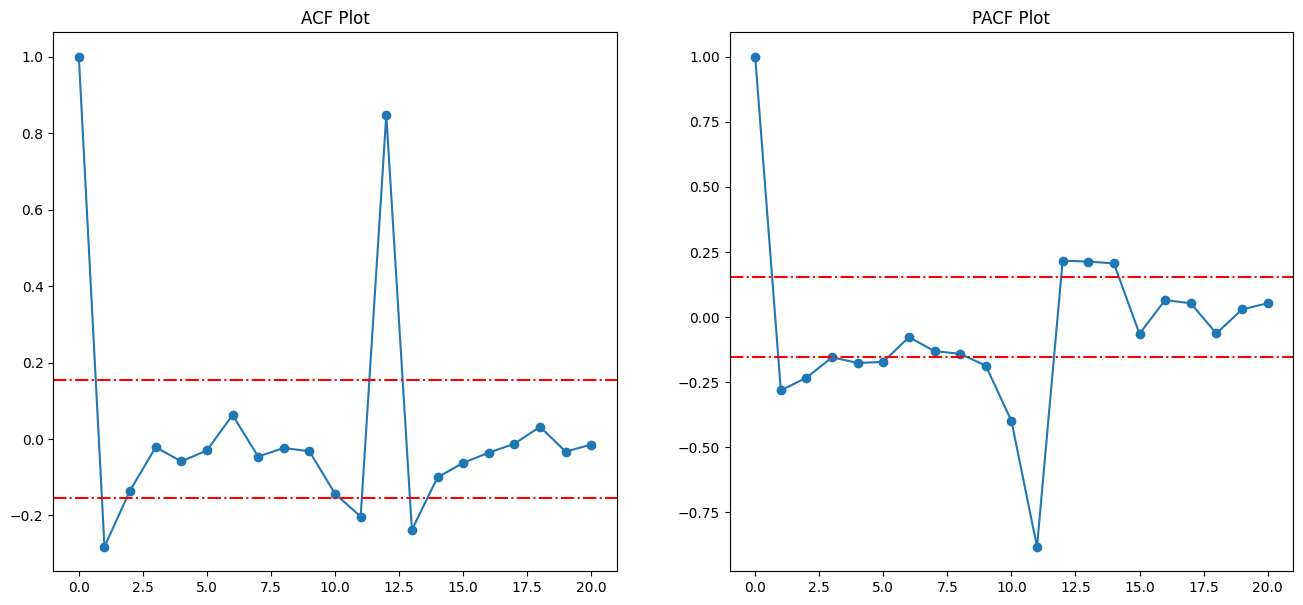

In [220]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(lag_acf,marker='o')
plt.title('ACF Plot')
plt.axhline(y=-1.96/np.sqrt(len(f_d)),color='red',ls='-.')
plt.axhline(y=1.96/np.sqrt(len(f_d)),color='red',ls='-.')

plt.subplot(1,2,2)
plt.plot(lag_pacf,marker='o')
plt.title('PACF Plot')
plt.axhline(y=-1.96/np.sqrt(len(f_d)),color='red',ls='-.')
plt.axhline(y=1.96/np.sqrt(len(f_d)),color='red',ls='-.')
plt.show()

In [221]:
len(f_d)

162

In [222]:
# plot model with p=1,d=1,q=0


In [223]:
# plot model with p=1,d=1,q=0
import statsmodels.api as sm
model = sm.tsa.ARIMA(log_train, order=(1,1,0), trend='t')
results = model.fit()


In [226]:
from sklearn.metrics import mean_squared_error

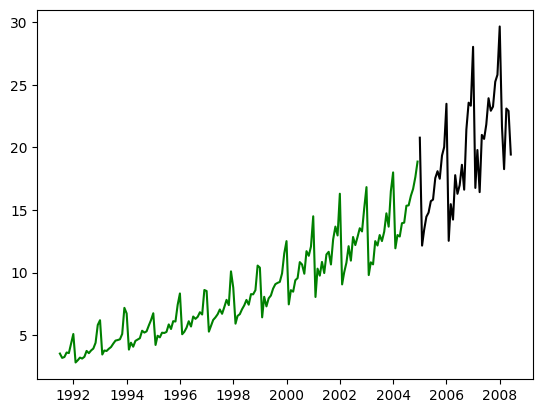

In [224]:
plt.plot(x_train.index,x_train.values,color='green')
plt.plot(x_test.index,x_test.values,color='black')

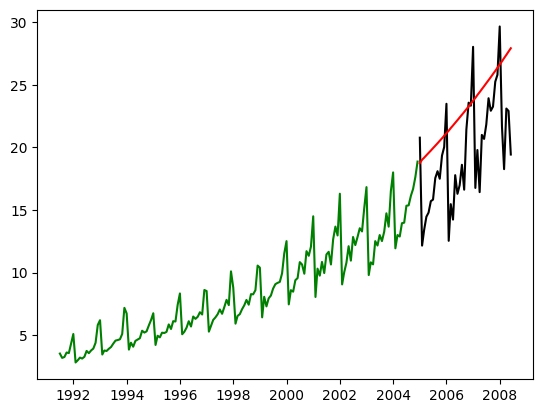

4.742310893938969


In [227]:
plt.plot(x_train.index,x_train.values,color='green')
plt.plot(x_test.index,x_test.values,color='black')
# forecast for test data
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns=['yhat']
pred.index=x_test.index
# convert forecasted to normla form
pred['yhat']=pred['yhat'].apply(lambda x: math.exp(x)-1)

# plot the forecast
plt.plot(pred.index,pred.fillna(0).values, color='red')
plt.show()

error=math.pow(mean_squared_error(x_test.values,pred.values),0.5)
print(error)

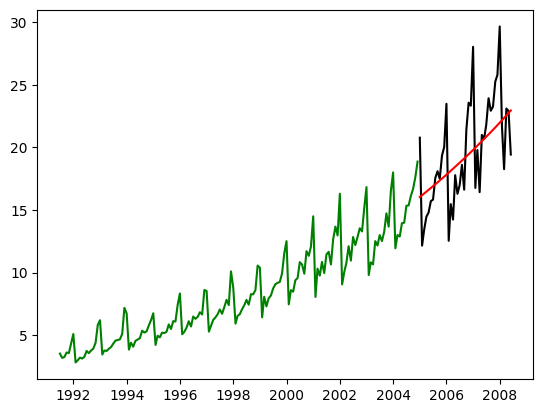

3.2026795511494357


In [229]:
# plotting MA model with p=0 , d=1 ,q=1

model=sm.tsa.arima.ARIMA(log_train,order=(0,1,1),trend='t')
results=model.fit()
plt.plot(x_train.index,x_train.values,color='green')
plt.plot(x_test.index,x_test.values,color='black')
# forecast for test data
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns=['yhat']
pred.index=x_test.index
# convert forecasted to normla form
pred['yhat']=pred['yhat'].apply(lambda x: math.exp(x)-1)

# plot the forecast
plt.plot(pred.index,pred.fillna(0).values, color='red')
plt.show()

error=math.pow(mean_squared_error(x_test.values,pred.values),0.5)
print(error
      )

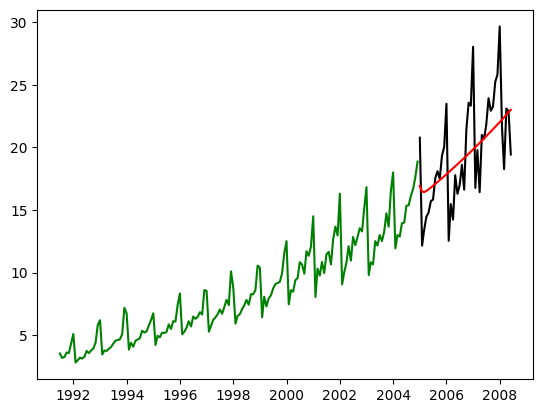

3.181554139937011


In [230]:
# plotting ARIMA model with p=1, d=1 ,q=1

model=sm.tsa.arima.ARIMA(log_train,order=(1,1,1),trend='t')
results=model.fit()
plt.plot(x_train.index,x_train.values,color='green')
plt.plot(x_test.index,x_test.values,color='black')
# forecast for test data
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns=['yhat']
pred.index=x_test.index
# convert forecasted to normla form
pred['yhat']=pred['yhat'].apply(lambda x: math.exp(x)-1)

# plot the forecast
plt.plot(pred.index,pred.fillna(0).values, color='red')
plt.show()

error=math.pow(mean_squared_error(x_test.values,pred.values),0.5)
print(error
      )